In [1]:
# restore variables from Data-Frame-Spring-2017(Scores,LOC,Survey,D3).ipynb

%store -r bogota0
%store -r bogota1
%store -r bogota2
%store -r bogota3

# restore variables from Functional-Basic-Preprocessing.ipynb

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

# load the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Performance Distance from the Best

In [2]:
# append all dataframes from all groups

bogota0['group'] = 0
bogota1['group'] = 1
bogota2['group'] = 2
bogota3['group'] = 3

bogota01 = bogota0.append(bogota1, ignore_index=True)
bogota12 = bogota01.append(bogota2, ignore_index=True)
bogota_final = bogota12.append(bogota3, ignore_index=True)

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_2830/169917622.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bogota01 = bogota0.append(bogota1, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_2830/169917622.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bogota12 = bogota01.append(bogota2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_2830/169917622.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bogota_final = bogota12.append(bogota3, ignore_index=True)


In [3]:
# get max total score for each group

bogota_final['total-max-phase1'] = bogota_final.groupby(["group"])['total-phase1'].transform(np.max)
bogota_final['total-max-phase2'] = bogota_final.groupby(["group"])['total-phase2'].transform(np.max)
bogota_final['total-max-phase3'] = bogota_final.groupby(["group"])['total-phase3'].transform(np.max)
bogota_final['total-max-phase4'] = bogota_final.groupby(["group"])['total-phase4'].transform(np.max)
bogota_final['total-max-phase5'] = bogota_final.groupby(["group"])['total-phase5'].transform(np.max)

In [4]:
# create new column for max performance distance in the dataframe

bogota_final['perform_diff_best_phase2'] = bogota_final['total-phase2'] - bogota_final['total-max-phase1']
bogota_final['perform_diff_best_phase3'] = bogota_final['total-phase3'] - bogota_final['total-max-phase2']
bogota_final['perform_diff_best_phase4'] = bogota_final['total-phase4'] - bogota_final['total-max-phase3']
bogota_final['perform_diff_best_phase5'] = bogota_final['total-phase5'] - bogota_final['total-max-phase4']


In [5]:
# see how the overall dataframe looks like

bogota_final

,Unnamed: 0,Student,Group,user-requirement-phase5,infovis-phase5,novelty-phase5,total-phase5,tech-phase5,tech-phase4,user-requirement-phase4,...,group,total-max-phase1,total-max-phase2,total-max-phase3,total-max-phase4,total-max-phase5,perform_diff_best_phase2,perform_diff_best_phase3,perform_diff_best_phase4,perform_diff_best_phase5
0,0,fffeelipe,0,20,29.17,50.00,199.17,100.0,100.0,20.0,...,0,300.83,247.50,293.33,313.33,352.92,-128.33,-75.00,-100.41,-114.16
1,1,mnguzmanc,0,60,75.00,67.50,290.00,87.5,87.5,20.0,...,0,300.83,247.50,293.33,313.33,352.92,-80.83,-10.83,-48.33,-23.33
2,2,jmcuestasb,0,100,54.17,25.00,254.17,75.0,62.5,100.0,...,0,300.83,247.50,293.33,313.33,352.92,-160.00,-115.00,-72.50,-59.16
3,3,katherinsb,0,20,37.50,16.67,136.67,62.5,37.5,20.0,...,0,300.83,247.50,293.33,313.33,352.92,-288.33,-247.50,-165.00,-176.66
4,4,jjrodriguezn,0,60,58.33,87.50,255.83,50.0,37.5,40.0,...,0,300.83,247.50,293.33,313.33,352.92,-189.16,-144.17,-161.66,-57.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,36,NicolasPrr,3,100,83.33,90.00,360.83,87.5,62.5,0.0,...,3,329.17,333.33,330.00,358.33,360.83,-229.17,-225.00,-209.17,2.50
159,37,jumcorredorro,3,100,62.50,75.00,325.00,87.5,87.5,80.0,...,3,329.17,333.33,330.00,358.33,360.83,-20.00,-3.33,-25.00,-33.33
160,38,feartheGru,3,0,0.00,0.00,0.00,0.0,0.0,NaN,...,3,329.17,333.33,330.00,358.33,360.83,-316.67,-333.33,-330.00,-358.33
161,39,Danielsv9207,3,0,0.00,0.00,0.00,0.0,0.0,NaN,...,3,329.17,333.33,330.00,358.33,360.83,-316.67,-333.33,-330.00,-358.33


In [6]:
bogota0_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[0]
bogota1_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[1]
bogota2_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[2]
bogota3_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[3]

bogota0_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[0]
bogota1_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[1]
bogota2_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[2]
bogota3_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[3]

bogota0_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[0]
bogota1_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[1]
bogota2_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[2]
bogota3_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[3]

bogota0_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[0]
bogota1_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[1]
bogota2_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[2]
bogota3_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[3]


## Before Absolute

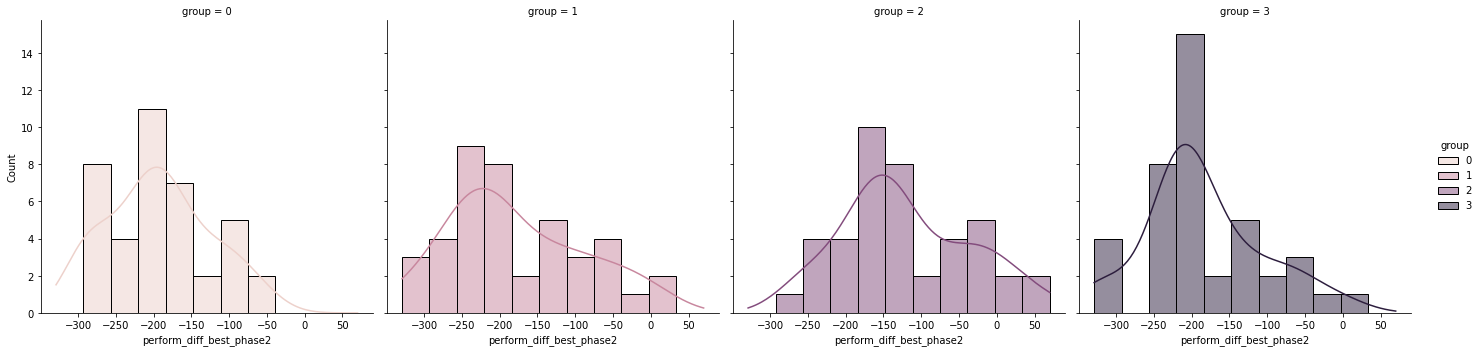

In [7]:
sns.displot(x='perform_diff_best_phase2', data=bogota_final, hue="group", col="group", kde=True)

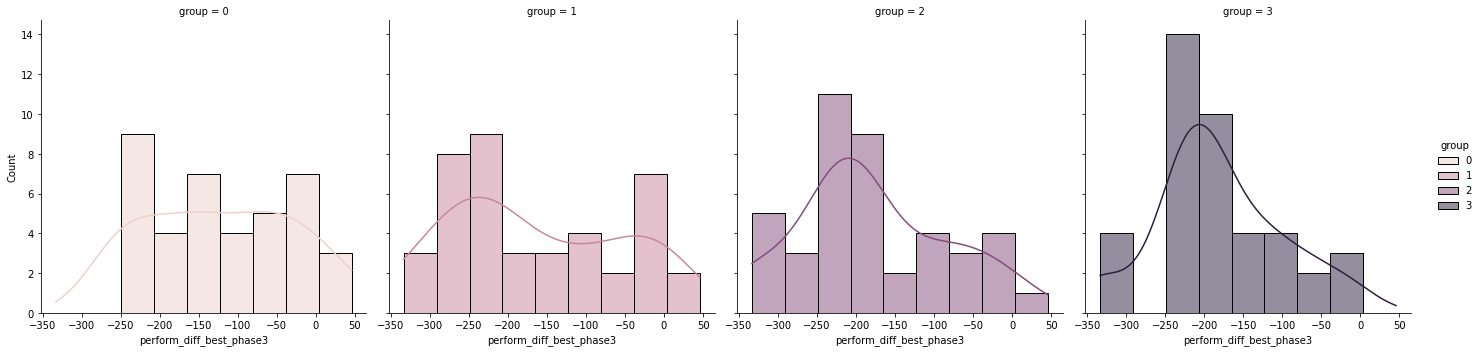

In [8]:
sns.displot(x='perform_diff_best_phase3', data=bogota_final, hue="group", col="group", kde=True)

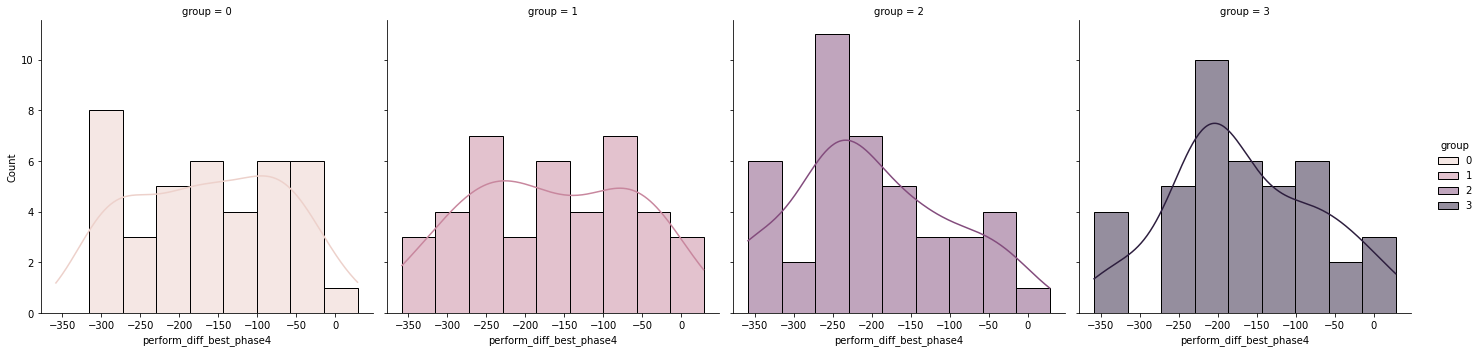

In [9]:
sns.displot(x='perform_diff_best_phase4', data=bogota_final, hue="group", col="group", kde=True)

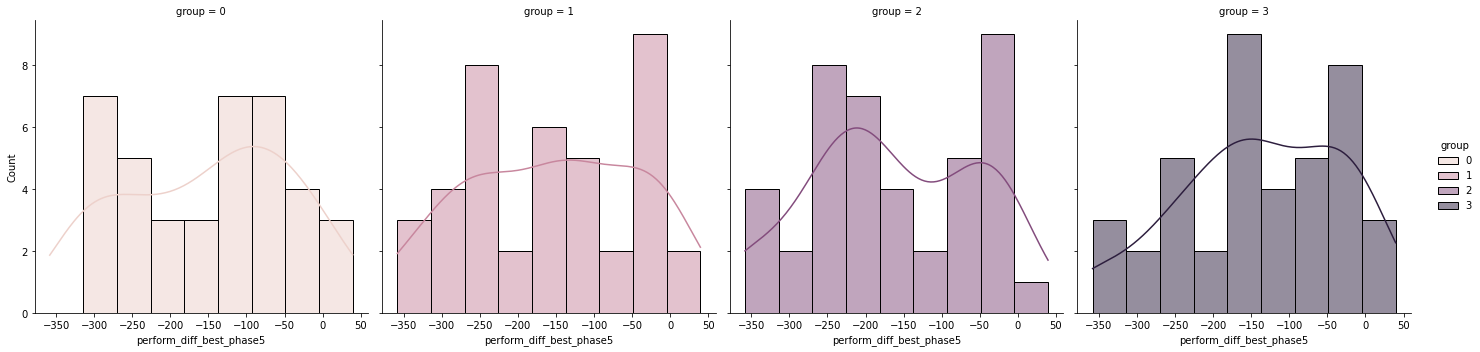

In [10]:
sns.displot(x='perform_diff_best_phase5', data=bogota_final, hue="group", col="group", kde=True)

## After Absolute 

In [11]:
bogota_final['abs_perform_diff_best_phase2'] = bogota_final['perform_diff_best_phase2'].abs()
bogota_final['abs_perform_diff_best_phase3'] = bogota_final['perform_diff_best_phase3'].abs()
bogota_final['abs_perform_diff_best_phase4'] = bogota_final['perform_diff_best_phase4'].abs()
bogota_final['abs_perform_diff_best_phase5'] = bogota_final['perform_diff_best_phase5'].abs()

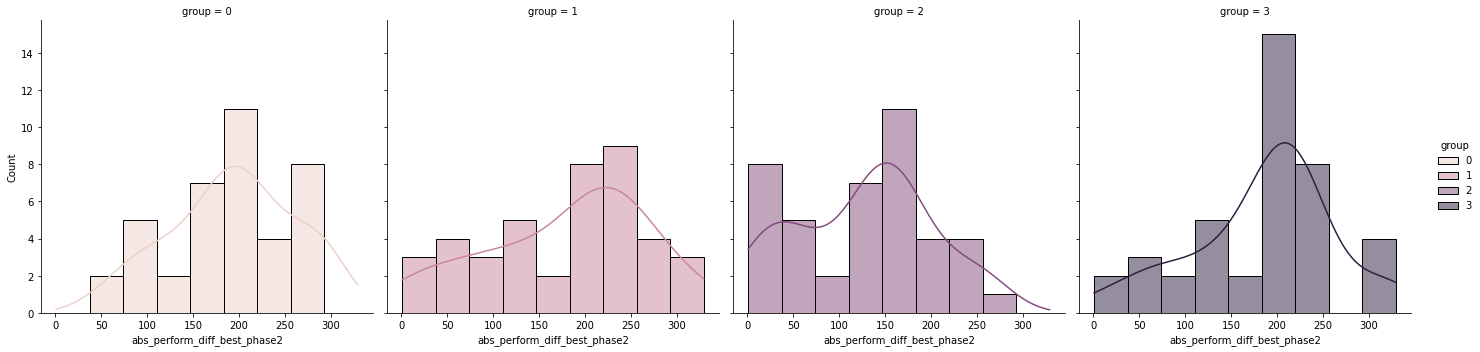

In [12]:
sns.displot(x='abs_perform_diff_best_phase2', data=bogota_final, hue="group", col="group", kde=True)

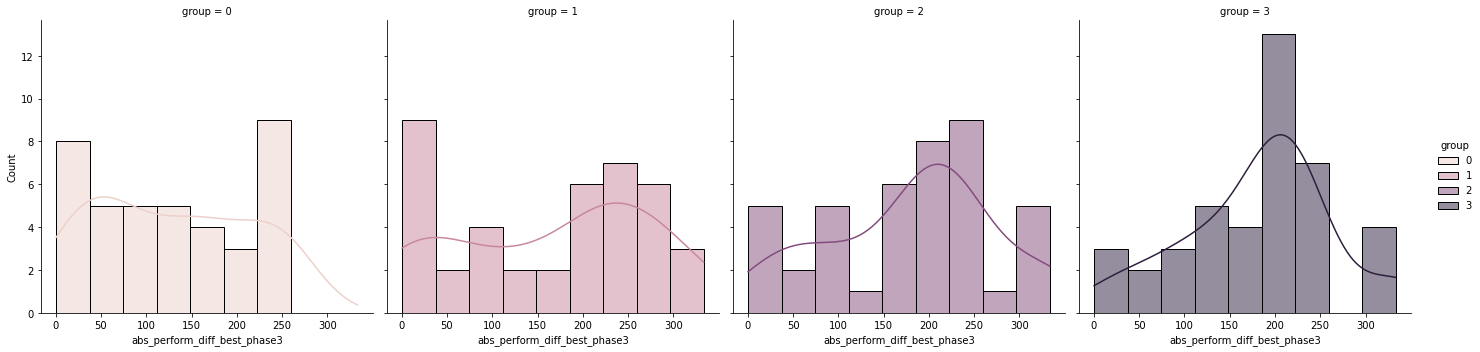

In [13]:
sns.displot(x='abs_perform_diff_best_phase3', data=bogota_final, hue="group", col="group", kde=True)

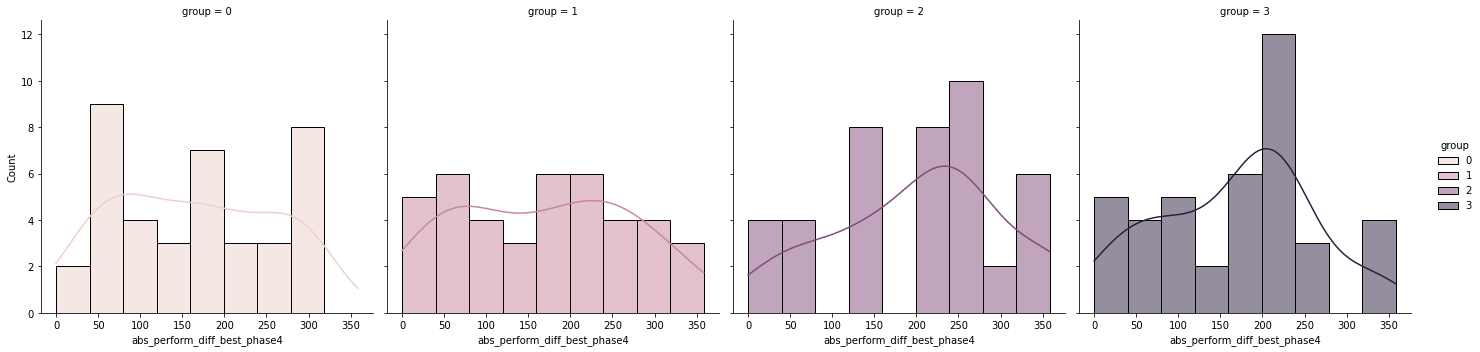

In [14]:
sns.displot(x='abs_perform_diff_best_phase4', data=bogota_final, hue="group", col="group", kde=True)

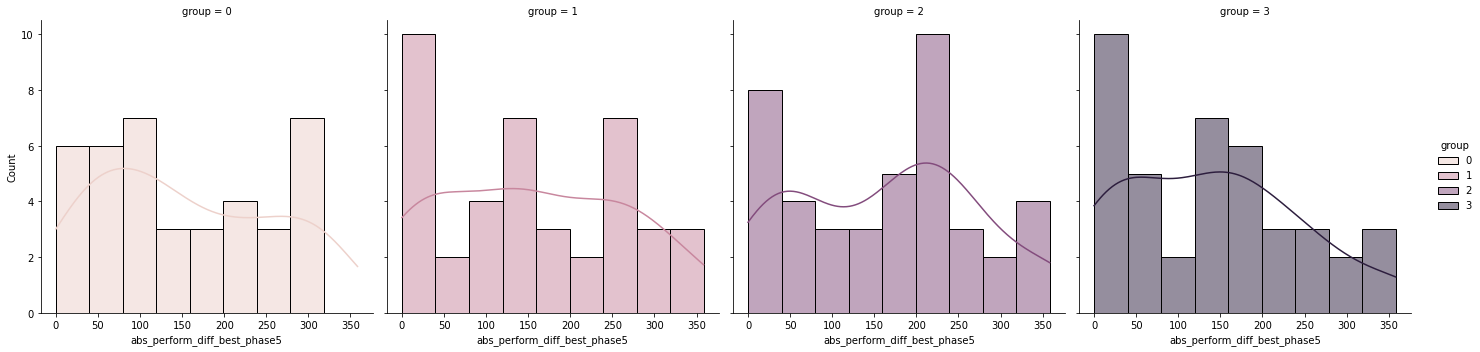

In [15]:
sns.displot(x='abs_perform_diff_best_phase5', data=bogota_final, hue="group", col="group", kde=True)

In [16]:
group0 = bogota_final[bogota_final['Group'] == 0]
group1 = bogota_final[bogota_final['Group'] == 1]
group2 = bogota_final[bogota_final['Group'] == 2]
group3 = bogota_final[bogota_final['Group'] == 3]

In [17]:
mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

min_log_bogota3 = []
min_log_bogota2 = []
min_log_bogota1 = []
min_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [group0['abs_perform_diff_best_phase2'], group0['abs_perform_diff_best_phase3'], group0['abs_perform_diff_best_phase4'], group0['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_bogota3.append(median_value)
    min_value = df.min()
    min_log_bogota3.append(min_value)
    max_value = df.max()
    max_log_bogota3.append(max_value)
    mean_log_bogota3.append(mean_value)

for df in [group1['abs_perform_diff_best_phase2'], group1['abs_perform_diff_best_phase3'], group1['abs_perform_diff_best_phase4'], group1['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_bogota2.append(median_value)
    min_value = df.min()
    min_log_bogota2.append(min_value)
    max_value = df.max()
    max_log_bogota2.append(max_value)
    mean_log_bogota2.append(mean_value)
    
for df in [group2['abs_perform_diff_best_phase2'], group2['abs_perform_diff_best_phase3'], group2['abs_perform_diff_best_phase4'], group2['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_bogota1.append(median_value)
    min_value = df.min()
    min_log_bogota1.append(min_value)
    max_value = df.max()
    max_log_bogota1.append(max_value)
    mean_log_bogota1.append(mean_value)

for df in [group3['abs_perform_diff_best_phase2'], group3['abs_perform_diff_best_phase3'], group3['abs_perform_diff_best_phase4'], group3['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_bogota0.append(median_value)
    min_value = df.min()
    min_log_bogota0.append(min_value)
    max_value = df.max()
    max_log_bogota0.append(max_value)
    mean_log_bogota0.append(mean_value)

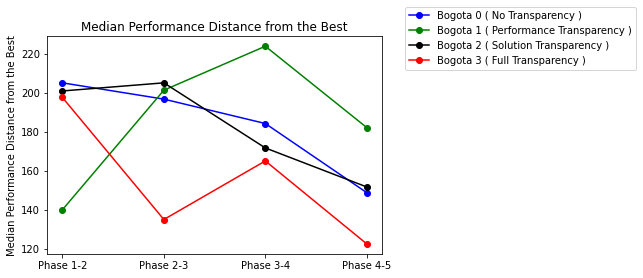

In [18]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Performance Distance from the Best")
plt.ylabel("Median Performance Distance from the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

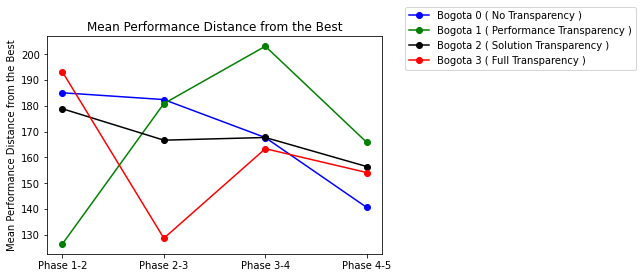

In [19]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Performance Distance from the Best")
plt.ylabel("Mean Performance Distance from the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Similarity from the Best

In [20]:
bogota3_phase1_high_compare = df1[df1['user1']==bogota3_phase1_high]
bogota3_phase2_high_compare = df2[df2['user1']==bogota3_phase2_high]
bogota3_phase3_high_compare = df3[df3['user1']==bogota3_phase3_high]
bogota3_phase4_high_compare = df4[df4['user1']==bogota3_phase4_high]

bogota2_phase1_high_compare = df1_bogota2[df1_bogota2['user1']==bogota2_phase1_high]
bogota2_phase2_high_compare = df2_bogota2[df2_bogota2['user1']==bogota2_phase2_high]
bogota2_phase3_high_compare = df3_bogota2[df3_bogota2['user1']==bogota2_phase3_high]
bogota2_phase4_high_compare = df4_bogota2[df4_bogota2['user1']==bogota2_phase4_high]

bogota1_phase1_high_compare = df1_bogota1[df1_bogota1['user1']==bogota1_phase1_high]
bogota1_phase2_high_compare = df2_bogota1[df2_bogota1['user1']==bogota1_phase2_high]
bogota1_phase3_high_compare = df3_bogota1[df3_bogota1['user1']==bogota1_phase3_high]
bogota1_phase4_high_compare = df4_bogota1[df4_bogota1['user1']==bogota1_phase4_high]

bogota0_phase1_high_compare = df1_bogota0[df1_bogota0['user1']==bogota0_phase1_high]
bogota0_phase2_high_compare = df2_bogota0[df2_bogota0['user1']==bogota0_phase2_high]
bogota0_phase3_high_compare = df3_bogota0[df3_bogota0['user1']==bogota0_phase3_high]
bogota0_phase4_high_compare = df4_bogota0[df4_bogota0['user1']==bogota0_phase4_high]


/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

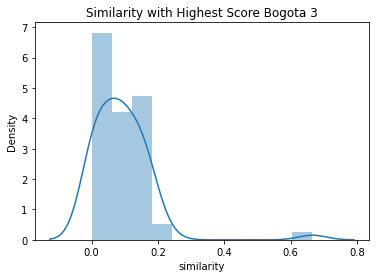

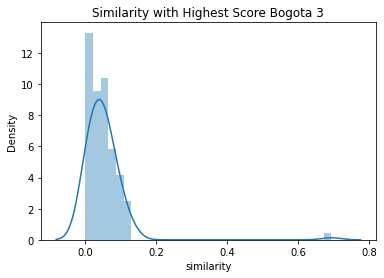

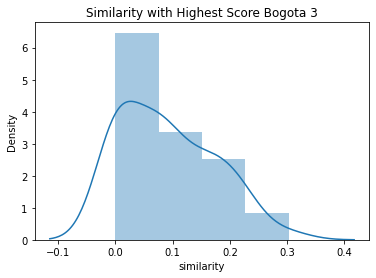

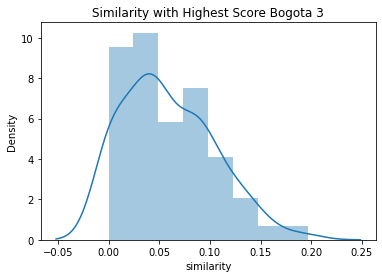

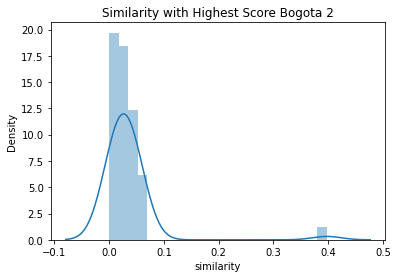

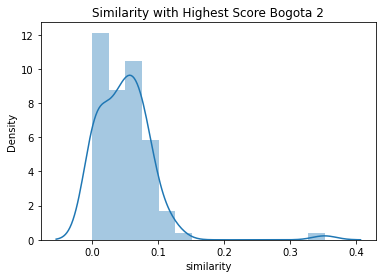

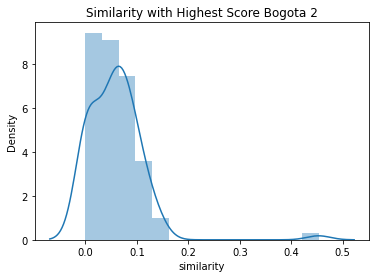

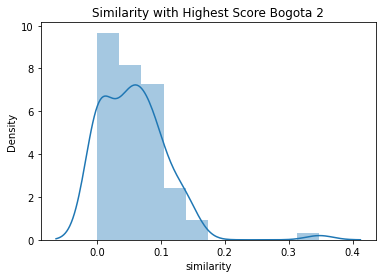

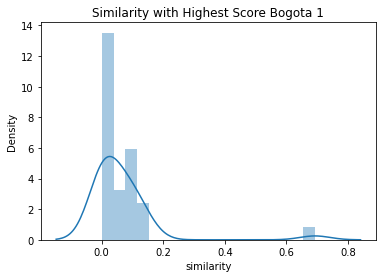

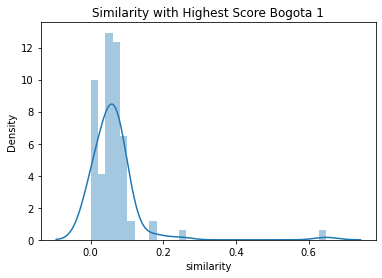

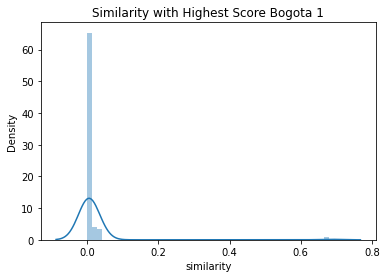

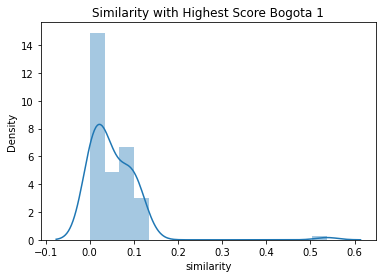

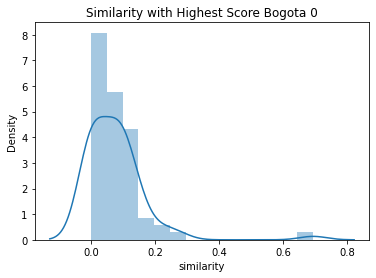

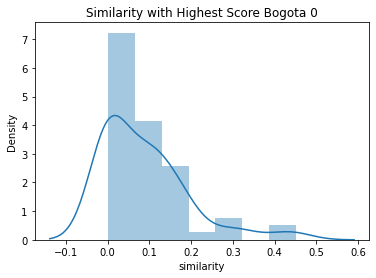

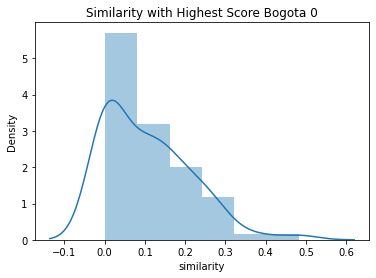

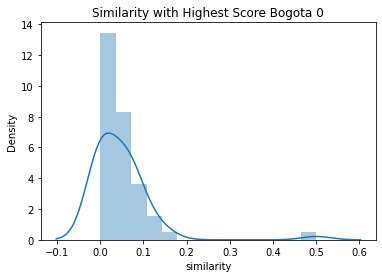

In [21]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [bogota3_phase1_high_compare, bogota3_phase2_high_compare, bogota3_phase3_high_compare, bogota3_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota3.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota3.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 3")
    sns.distplot(np.log(df['similarity']+1))

for df in [bogota2_phase1_high_compare, bogota2_phase2_high_compare, bogota2_phase3_high_compare, bogota2_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota2.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota2.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 2")
    sns.distplot(np.log(df['similarity']+1))
    
for df in [bogota1_phase1_high_compare, bogota1_phase2_high_compare, bogota1_phase3_high_compare, bogota1_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota1.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota1.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 1")
    sns.distplot(np.log(df['similarity']+1))

for df in [bogota0_phase1_high_compare, bogota0_phase2_high_compare, bogota0_phase3_high_compare, bogota0_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota0.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota0.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 0")
    sns.distplot(np.log(df['similarity']+1))
    

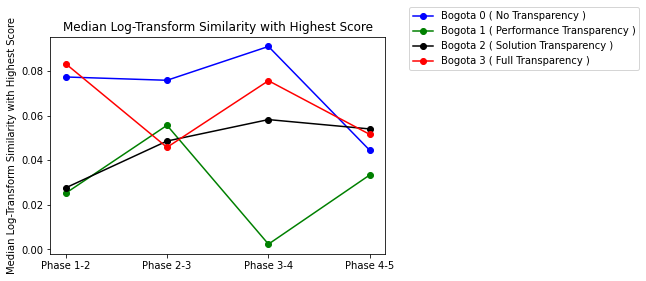

In [22]:
import matplotlib.pyplot as plt

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Log-Transform Similarity with Highest Score")
plt.ylabel("Median Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

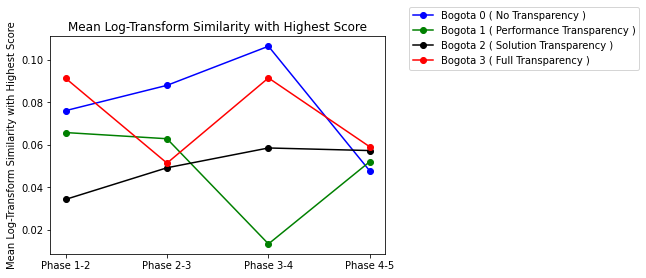

In [23]:
import matplotlib.pyplot as plt

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

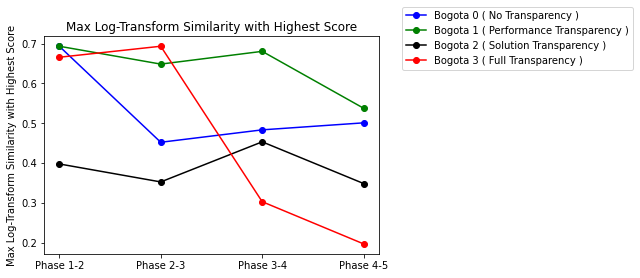

In [24]:
import matplotlib.pyplot as plt

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Max Log-Transform Similarity with Highest Score")
plt.ylabel("Max Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)